In [130]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

print(iris_data[1], iris_data[51], iris_data[101])
print(iris_labels[1], iris_labels[51], iris_labels[101])

[4.9 3.  1.4 0.2] [6.4 3.2 4.5 1.5] [5.8 2.7 5.1 1.9]
0 1 2


In [131]:
import numpy as np
import pandas as pd

data = pd.read_csv('iris.csv')
X_data = data.iloc[:, :-1].values
y_target = data.iloc[:, -1].values

#X_data = np.genfromtxt("iris.csv", delimiter=",", skip_header=1)[:,:-1]
#y_target = np.genfromtxt("iris.csv", delimiter=",", skip_header=1, usecols=-1, dtype=str)


print(X_data[1], X_data[51], X_data[101])
print(y_target[1], y_target[51], y_target[101])

[4.7 3.2 1.3 0.2] [6.9 3.1 4.9 1.5] [7.1 3.  5.9 2.1]
Iris-setosa Iris-versicolor Iris-virginica


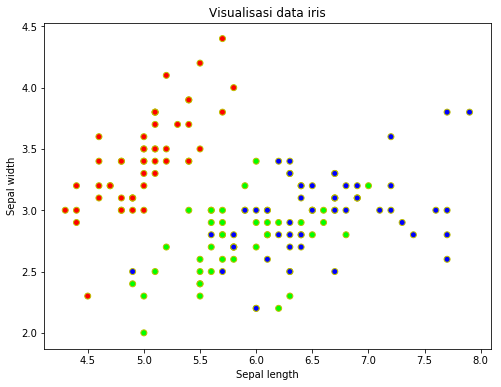

In [132]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Visualisasi data iris')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

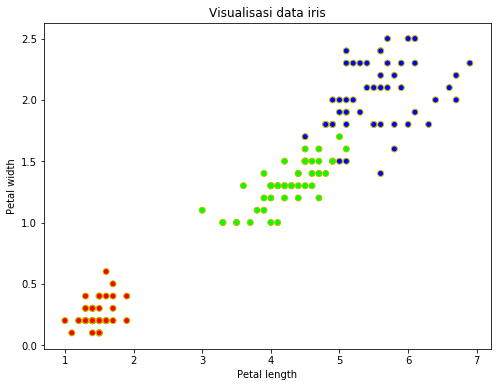

In [133]:

X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Visualisasi data iris')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

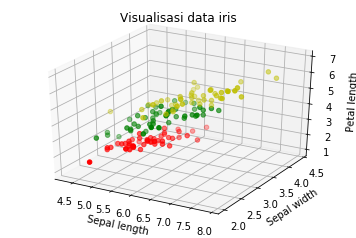

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = []
for kelas in range(3):
    X.append([[], [], []])
    for i in range(len(iris_data)):
        if iris_labels[i] == kelas:
            X[kelas][0].append(iris_data[i][0])
            X[kelas][1].append(iris_data[i][1])
            X[kelas][2].append(iris_data[i][2])
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for kelas in range(3):
       ax.scatter(X[kelas][0], X[kelas][1], X[kelas][2], c=colours[kelas])

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.title('Visualisasi data iris')
plt.show()

In [135]:
np.random.seed(45)
indices = np.random.permutation(len(iris_data))
n_samples = 50

trainset_data = iris_data[indices[:-n_samples]]
trainset_labels = iris_labels[indices[:-n_samples]]

testset_data = iris_data[indices[-n_samples:]]
testset_labels = iris_labels[indices[-n_samples:]]

print(trainset_data.shape, trainset_labels.shape)
print(testset_data.shape, testset_labels.shape)

(100, 4) (100,)
(50, 4) (50,)


In [136]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=.33)
print('X_train', X_train.shape, 'Y_train', Y_train.shape)
print('X_test', X_test.shape, 'Y_test', Y_test.shape)

X_train (100, 4) Y_train (100,)
X_test (50, 4) Y_test (50,)


In [137]:
def distance(data1, data2):
   
    data1 = np.array(data1) 
    data2 = np.array(data2)
    
    return np.linalg.norm(data1 - data2)

print(iris_data[1])
print(iris_data[51])
print(distance(iris_data[1], iris_data[51]))


[4.9 3.  1.4 0.2]
[6.4 3.2 4.5 1.5]
3.6864617182333523


In [139]:
import math
def euclideanDistance(data1, data2, panjang):
	distance = 0
	for x in range(panjang):
		distance += pow((data1[x] - data2[x]), 2)
	return math.sqrt(distance)

panjang = len(iris_data[1])
print(iris_data[1])
print(iris_data[51])
print(euclideanDistance(iris_data[1], iris_data[51], panjang))

[4.9 3.  1.4 0.2]
[6.4 3.2 4.5 1.5]
3.6864617182333523


In [49]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [28]:
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              Y_train, 
                              X_test[i], 
                              3, 
                              distance=distance)
    print(i, 
          X_test[i], 
          Y_test[i], 
          neighbors)

0 [5.  3.6 1.4 0.2] 0 [(array([5.1, 3.5, 1.4, 0.2]), 0.1414213562373093, 0), (array([5.1, 3.5, 1.4, 0.3]), 0.17320508075688756, 0), (array([5. , 3.4, 1.5, 0.2]), 0.22360679774997916, 0)]
1 [7.1 3.  5.9 2.1] 2 [(array([6.8, 3.2, 5.9, 2.3]), 0.4123105625617659, 2), (array([7.4, 2.8, 6.1, 1.9]), 0.45825756949558427, 2), (array([6.8, 3. , 5.5, 2.1]), 0.5000000000000001, 2)]
2 [5.7 2.6 3.5 1. ] 1 [(array([5.5, 2.4, 3.8, 1.1]), 0.42426406871192857, 1), (array([5.6, 2.5, 3.9, 1.1]), 0.43588989435406744, 1), (array([5.8, 2.7, 3.9, 1.2]), 0.4690415759823428, 1)]
3 [5.8 2.7 4.1 1. ] 1 [(array([5.8, 2.7, 3.9, 1.2]), 0.2828427124746188, 1), (array([5.7, 2.8, 4.1, 1.3]), 0.3316624790355398, 1), (array([5.6, 2.5, 3.9, 1.1]), 0.360555127546399, 1)]
4 [4.9 3.  1.4 0.2] 0 [(array([4.9, 3.1, 1.5, 0.1]), 0.17320508075688784, 0), (array([4.9, 3.1, 1.5, 0.1]), 0.17320508075688784, 0), (array([5. , 3. , 1.6, 0.2]), 0.22360679774997896, 0)]


In [50]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [57]:
for i in range(n_samples):
    neighbors = get_neighbors(X_train, 
                              Y_train, 
                              X_test[i], 
                              3, 
                              distance=distance)

    print("indeks: ", i, 
          ", prediksi: ", vote(neighbors), 
          ", label: ", Y_test[i], 
          ", data: ", X_test[i])

indeks:  0 , prediksi:  1 , label:  1 , data:  [5.6 3.  4.1 1.3]
indeks:  1 , prediksi:  2 , label:  2 , data:  [6.9 3.1 5.4 2.1]
indeks:  2 , prediksi:  0 , label:  0 , data:  [4.8 3.4 1.9 0.2]
indeks:  3 , prediksi:  1 , label:  1 , data:  [5.9 3.  4.2 1.5]
indeks:  4 , prediksi:  0 , label:  0 , data:  [5.4 3.7 1.5 0.2]
indeks:  5 , prediksi:  2 , label:  2 , data:  [5.8 2.7 5.1 1.9]
indeks:  6 , prediksi:  2 , label:  2 , data:  [6.7 3.  5.2 2.3]
indeks:  7 , prediksi:  2 , label:  2 , data:  [6.7 2.5 5.8 1.8]
indeks:  8 , prediksi:  1 , label:  1 , data:  [6.9 3.1 4.9 1.5]
indeks:  9 , prediksi:  0 , label:  0 , data:  [5.  3.2 1.2 0.2]
indeks:  10 , prediksi:  2 , label:  2 , data:  [7.9 3.8 6.4 2. ]
indeks:  11 , prediksi:  0 , label:  0 , data:  [5.1 3.8 1.6 0.2]
indeks:  12 , prediksi:  0 , label:  0 , data:  [5.1 3.8 1.9 0.4]
indeks:  13 , prediksi:  0 , label:  0 , data:  [5.4 3.9 1.7 0.4]
indeks:  14 , prediksi:  0 , label:  0 , data:  [5.2 4.1 1.5 0.1]
indeks:  15 , predik